In [1]:
import pandas as pd
import sqlite3 as sql

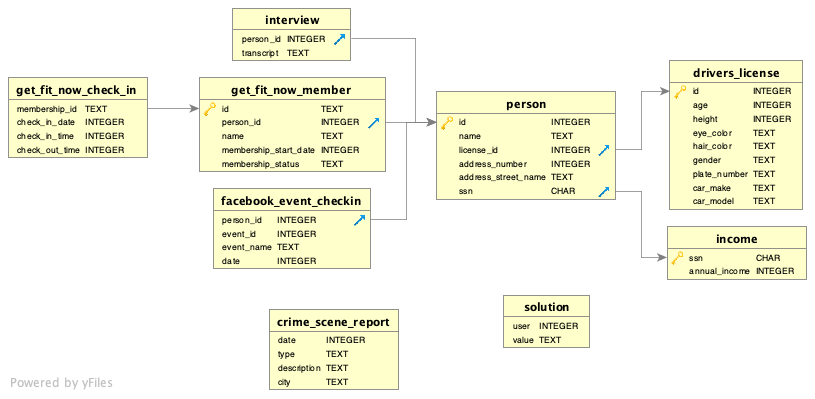

In [2]:
from IPython.display import Image

Image("schema.png",width=900)


There's been a Murder in SQL City! The SQL Murder Mystery is designed to be both a self-directed lesson to learn SQL concepts and commands and a fun game for experienced SQL users to solve an intriguing crime.

A crime has taken place and the detective needs your help. The detective gave you the crime scene report, but you somehow lost it. You vaguely remember that the crime was a murder that occurred sometime on Jan.15, 2018 and that it took place in SQL City. Start by retrieving the corresponding crime scene report from the police department’s database.

You can solve the mystery on their website (http://mystery.knightlab.com/) itself or download it from the github repository (https://github.com/NUKnightLab/sql-mysteries) and solve it in your preferred method.

I have uploaded the database file in the kaggle dataset section - https://www.kaggle.com/datasets/johnp47/sql-murder-mystery-database

In [3]:
# #setting up a connection to the database

con = sql.connect("sql-murder-mystery.db")

In [4]:
# #running our first query, looking for data from crime scene report

query_1 = '''
SELECT * 
FROM crime_scene_report
WHERE city = "SQL City"
ORDER BY date;
'''

#seting the dataframe width to max
pd.set_option('display.max_colwidth', None)

#running our query
pd.read_sql_query(query_1, con)


,date,type,description,city
0,20170712,theft,"A lone hunter stalks the night, firing arrows into the Darkness.\n There is no hiding, no escape. In the distance, the beast\n falters, tethered to the void. The killing blow comes without\n hesitation, without mercy.",SQL City
1,20170820,arson,"Wield the Hammer of Sol with honor, Titan, it is a thing of\n legend, both past and future.",SQL City
2,20171110,robbery,"The Gjallarhorn shoulder-mounted rocket system was forged from\n the armor of Guardians who fell at the Twilight Gap. Gifted\n to the survivors of that terrible battle, the Gjallarhorn\n is seen as a symbol of honor and survival.",SQL City
3,20180103,bribery,"Apparently, Cayde thought it necessary to expose this extremely\n rare vegetable to a Hive summoning ritual.",SQL City
4,20180115,assault,"Hamilton: Lee, do you yield? Burr: You shot him in the side! Yes he yields!",SQL City
5,20180115,assault,Report Not Found,SQL City
6,20180115,murder,"Security footage shows that there were 2 witnesses. The first witness lives at the last house on ""Northwestern Dr"". The second witness, named Annabel, lives somewhere on ""Franklin Ave"".",SQL City
7,20180215,murder,REDACTED REDACTED REDACTED,SQL City
8,20180215,murder,Someone killed the guard! He took an arrow to the knee!,SQL City


Security footage shows that there were 2 witnesses.

The first witness lives at the last house on "Northwestern Dr". The second witness, named Annabel,lives somewhere on "Franklin Ave"

Got our crime scene report, as per the report there are 2 witnesses. Let's, look for them.

Rüşvet (Bribery)
Soygun (Robbery)
Kundaklama/Yangın Çıkarma (Arson)
Hırsızlık (Theft)
Witnesses / Tanık

In [5]:
# Checking personal details of both the witnesses

query_2 = '''
SELECT * 
FROM person
WHERE address_street_name = "Northwestern Dr"
ORDER BY address_number desc ;
'''
pd.read_sql_query(query_2,con)[:1]

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


In [6]:
query_3 = '''
SELECT * 
FROM person
WHERE name Like '%Annabel%' AND address_street_name = "Franklin Ave";
'''
pd.read_sql_query(query_3,con)


,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


In [7]:
# #lets view the interview of both the witnesses taken after the murder.

query_4 = '''
SELECT *
FROM interview
WHERE person_id = 14887 OR person_id = 16371;
'''

pd.read_sql_query(query_4,con)

,person_id,transcript
0,14887,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership number on the bag started with ""48Z"". Only gold members have those bags. The man got into a car with a plate that included ""H42W""."
1,16371,"I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th."


So, we got 2 clues-

Killer is a man and a member of the gym with a status of gold and having a membership no. starting with 48Z and left in a car with a no. plate of H42W
He was working out in the gym on 9th of Jan

In [8]:
#Checking the gym database with above details
query_5 = '''
SELECT *
FROM get_fit_now_check_in 
WHERE membership_id like "%48Z%" AND check_in_date = 20180109 
order by check_in_date;
'''
pd.read_sql_query(query_5, con)

,membership_id,check_in_date,check_in_time,check_out_time
0,48Z7A,20180109,1600,1730
1,48Z55,20180109,1530,1700


Two member's found and their membership id

In [9]:
#now, let's check the car details by the above details
query_6 = '''
SELECT *
FROM drivers_license
WHERE plate_number like "%H42W%";
'''
pd.read_sql_query(query_6, con)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,183779,21,65,blue,blonde,female,H42W0X,Toyota,Prius
1,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
2,664760,21,71,black,black,male,4H42WR,Nissan,Altima


Two male with a plate no. containg H42W

In [10]:
#checking personal details of both the males from the above query
query_7 = '''
SELECT *
FROM person
WHERE license_id = "423327" OR license_id = "664760";
'''
pd.read_sql_query(query_7, con)

,id,name,license_id,address_number,address_street_name,ssn
0,51739,Tushar Chandra,664760,312,Phi St,137882671
1,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


In [11]:
#lets check which of this two are a member of the gym?
query_8 = '''
SELECT *
FROM get_fit_now_member
WHERE person_id = "51739" OR person_id = "67318";
'''
pd.read_sql_query(query_8, con)

,id,person_id,name,membership_start_date,membership_status
0,48Z55,67318,Jeremy Bowers,20160101,gold


Finally, found the murderer -<b>Jeremy Bowers.</b> Both the membership id and status also matches as per the information we found earlier.

Now to confirm you can visit the website and run this query

INSERT INTO solution VALUES (1, 'Jeremy Bowers'); SELECT value FROM solution;

<b>Result shown is:</b>

Congrats, you found the murderer! But wait, there's more... If you think you're up for a challenge, try querying the interview transcript of the murderer to find the real villain behind this crime. If you feel especially confident in your SQL skills, try to complete this final step with no more than 2 queries. Use this same INSERT statement with your new suspect to check your answer.

In [12]:
#There's more to this, reading the transcript of the murderer
query_9 = '''
SELECT *
FROM interview
WHERE person_id = 67318;
'''
pd.read_sql_query(query_9, con)


,person_id,transcript
0,67318,"I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5"" (65"") or 5'7"" (67""). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017.\n"


So, the real villain is a woman with a Tesla car and red hair. Using the above clues let find out who's the mastermind behind this murder.

In [13]:
query_10 = '''
SELECT *
FROM drivers_license
WHERE car_make = "Tesla" AND car_model = "Model S" AND 
gender = "female" AND hair_color = "red";
'''
pd.read_sql_query(query_10, con)


,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,202298,68,66,green,red,female,500123,Tesla,Model S
1,291182,65,66,blue,red,female,08CM64,Tesla,Model S
2,918773,48,65,black,red,female,917UU3,Tesla,Model S


Three woman with Tesla Model S and red hair color

In [14]:
#personal details of the above three woman are:
query_11 = '''
SELECT *
FROM person
WHERE license_id = "202298" OR license_id = "291182" OR license_id = "918773";
'''
pd.read_sql_query(query_11, con)


,id,name,license_id,address_number,address_street_name,ssn
0,78881,Red Korb,918773,107,Camerata Dr,961388910
1,90700,Regina George,291182,332,Maple Ave,337169072
2,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


In [15]:
#checking the event SQL symphony concert
query_12 = '''
SELECT person_id, count(*), event_name
FROM facebook_event_checkin 
GROUP BY person_id
having count(*) = 3 AND event_name = "SQL Symphony Concert" AND date like "%201712%";
'''
pd.read_sql_query(query_12, con)

,person_id,count(*),event_name
0,24556,3,SQL Symphony Concert
1,99716,3,SQL Symphony Concert


Finally, found the mastermind/real villian of this whole mystry - Miranda Priestly

Now, confirming it on the website shows us-

INSERT INTO solution VALUES (1, 'Miranda Priestly'); SELECT value FROM solution;

Result is: Congrats, you found the brains behind the murder! Everyone in SQL City hails you as the greatest SQL detective of all time. Time to break out the champagne!

<a href="https://www.linkedin.com/in/onur-gumus/"> You can connect with me on  LinkedIn Onur Gumus</a>
